# CS 492 Project
## FactOrFake : Fake News Detection Using Machine Learning Algorithms 

### 1. Data Collection and Preprocessing

! pip install wordcloud 

In [93]:
! pip install seaborn

In [85]:
import pandas as pd
import itertools
import nltk
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score, precision_score
%matplotlib inline

The first dataset used is the FakeNewsNet Dataset, it has 4 files, fake and real news datasets from PotiFact and GossipCop each.

In [6]:
df_poltifake = pd.read_csv("Datasets\FakeNewsNet\dataset\politifact_fake.csv")
df_poltifake.head()

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...


In [7]:
df_poltifake.shape

(432, 4)

In [8]:
df_poltifake['news_url'].nunique()

428

It seems as if there is not much repetition in terms of url, they are mostly unique, so it won't be of much use in this dataset as a feature. Still we will keep them for now, in case it proves to be useful in future datasets.

In [9]:
# Adding target column
df_poltifake['target'] = 0

In [10]:
df_poltifake.head()

,id,news_url,title,tweet_ids,target
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...,0
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...,0
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...,0
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...,0
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...,0


In [11]:
df_poltifake.drop(df_poltifake.columns[[0,3]],axis=1,inplace=True)

Dataset after selecting only the required features.

In [12]:
df_poltifake.head()

,news_url,title,target
0,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,0
1,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,0
2,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,0
3,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,0
4,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,0


In [13]:
# Dropping rows with null values
df_poltifake.dropna()
df_poltifake.shape

(432, 3)

The major preprocessing steps used for individual datasets are: 
* Adding target column
* Dropping rows with null values
* Selecting only the required features
* Updating feature names as required

Same is repeated for other datasets with a few changes as needed.

In [14]:
df = pd.read_csv("Datasets\FakeNewsNet\dataset\politifact_real.csv")
df.dropna(inplace=True)
df['target'] = 1
df.drop(df.columns[[0,3]],axis=1,inplace=True)
df.head()

,news_url,title,target
0,http://www.nfib-sbet.org/,National Federation of Independent Business,1
1,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,1
4,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",1
5,http://www.politifact.com/truth-o-meter/statem...,Donald Trump exaggerates when he says China ha...,1
6,https://www.law.cornell.edu/constitution/amend...,25th Amendment,1


In [15]:
df.shape

(373, 3)

Now, we are iteratively gonna combine the individual preprocessed datasets to get a large dataset.

In [16]:
df_combined = pd.concat([df_poltifake,df])
df_combined.shape

(805, 3)

In [17]:
df = pd.read_csv("Datasets\FakeNewsNet\dataset\gossipcop_real.csv")
df.head()

,id,news_url,title,tweet_ids
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...


In [18]:
df.dropna(inplace=True)
df['target'] = 1
df.drop(df.columns[[0,3]],axis=1,inplace=True)
df.head()

,news_url,title,target
0,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,1
1,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,1
2,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,1
3,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,1
4,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,1


In [19]:
df.shape

(15747, 3)

In [20]:
df_combined = pd.concat([df_combined,df])
df_combined.shape

(16552, 3)

In [21]:
df = pd.read_csv("Datasets\FakeNewsNet\dataset\gossipcop_fake.csv")
df['target'] = 1
df.drop(df.columns[[0,3]],axis=1,inplace=True)
df.dropna(inplace=True)
df.head()

,news_url,title,target
0,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,1
1,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,1
2,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,1
3,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,1
4,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,1


In [22]:
df.shape

(5067, 3)

In [23]:
df_combined = pd.concat([df_combined,df])
df_fakenewsnet = df_combined
df_combined.shape

(21619, 3)

Next dataset in use  : Getting Real About Fake News (only contains fake news).

In [24]:
df_fake = pd.read_csv("Datasets/getting_real_about_fake_news/fake.csv")
df_fake.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [25]:
df_fake.shape

(12999, 20)

Multiple languages are there, so we are selecting only English

In [26]:
df_fake=df_fake[df_fake["language"]=="english"]

In [27]:
df_fake.shape

(12403, 20)

In [28]:
df_fake_new=df_fake.loc[:,["site_url","thread_title"]]
df_fake_new["target"]=0
df_fake_new.shape

(12403, 3)

In [29]:
df_fake_new.head()

,site_url,thread_title,target
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In Gov’t B...,0
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,0
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,0
3,100percentfedup.com,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0
4,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0


Renaming the column names to match the combined dataset

In [30]:
df_fake_new.rename(columns = {'site_url':'news_url','thread_title':'title'}, inplace = True)
df_fake_new.head()

,news_url,title,target
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In Gov’t B...,0
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,0
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,0
3,100percentfedup.com,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0
4,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0


In [31]:
df_fake_new.groupby('news_url').count()

,title,target
news_url,,
100percentfedup.com,33,33
21stcenturywire.com,24,24
abcnews.com.co,2,2
abeldanger.net,96,100
abovetopsecret.com,100,100
...,...,...
worldnewspolitics.com,1,1
worldtruth.tv,100,100
wundergroundmusic.com,2,2


As seen above, url is repeated.

In [32]:
df_fake_new['news_url'].nunique()

237

In [33]:
df_combined=pd.concat([df_combined,df_fake_new])
df_combined.shape

(34022, 3)

In [34]:
df_combined.head()

,news_url,title,target
0,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,0
1,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,0
2,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,0
3,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,0
4,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,0


Next few datasets contain news regarding Covid !9, both real and fake.

In [35]:
df_fake = pd.read_csv("Datasets/Covid 19/NewsFakeCOVID-19.csv")
df_fake.head()

,Unnamed: 0,type,fact_check_url,archieve,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords
0,889,post,https://healthfeedback.org/claimreview/false-c...,https://archive.is/geT2g,https://www.facebook.com/drelizabethdc/posts/1...,NaN,NaN,NaN,NaN,The U.S. CDC quietly updated their numbers in ...,"""Log In or Sign Up to View""",you must log in to continue ..,NaN,NaN,""""""
1,890,post,https://factcheck.afp.com/trump-retweets-false...,http://archive.is/pZ2Pk,https://twitter.com/littllemel/status/12997914...,NaN,NaN,NaN,NaN,Social media posts shared thousands of times a...,"""""",we 've detected that javascript is disabled in...,NaN,NaN,""""""
2,891,NaN,https://www.factcheck.org/2020/09/cdc-did-not-...,https://projects.propublica.org/politwoops/twe...,NaN,NaN,NaN,NaN,NaN,The CDC updated the COVID-19 number to admit t...,NaN,NaN,NaN,NaN,NaN
3,892,post,https://healthfeedback.org/claimreview/masks-o...,https://archive.vn/k8PJk,https://www.facebook.com/120381895036072/posts...,NaN,NaN,NaN,NaN,Either masks work or they don’t; if masks work...,"""Log In or Sign Up to View""",do you want to join facebook ?.,NaN,NaN,""""""
4,893,article,https://healthfeedback.org/claimreview/human-d...,https://archive.is/Af8Xi,https://pieceofmindful.com/2020/04/06/bombshel...,NaN,NaN,NaN,NaN,The RT-PCR test for the virus that causes COVI...,"""BOMBSHELL: WHO Coronavirus PCR Test Primer Se...",this was important enough that i wanted to get...,this was important enough that i wanted to get...,2020-04-06T17:27:39+00:00,""""""


In [36]:
df_fake.shape

(56, 15)

In [37]:
df_fake = df_fake.dropna(subset = ['news_url'])
df_fake = df_fake.dropna(subset = ['title'])
df_fake.shape

(53, 15)

In [38]:
df_fake = df_fake.loc[:,['news_url','title']]

In [39]:
df_fake['target'] = 0
df_fake.head()

,news_url,title,target
0,https://www.facebook.com/drelizabethdc/posts/1...,The U.S. CDC quietly updated their numbers in ...,0
1,https://twitter.com/littllemel/status/12997914...,Social media posts shared thousands of times a...,0
3,https://www.facebook.com/120381895036072/posts...,Either masks work or they don’t; if masks work...,0
4,https://pieceofmindful.com/2020/04/06/bombshel...,The RT-PCR test for the virus that causes COVI...,0
5,https://summit.news/2020/08/20/governor-of-mai...,The Governor of Maine has ordered restaurant s...,0


In [40]:
df_fake['news_url'].nunique()

52

In [41]:
df_combined=pd.concat([df_combined,df_fake])
df_combined.shape

(34075, 3)

In [42]:
df_fake = pd.read_csv("Datasets/Covid 19/NewsFakeCOVID-19_5.csv")
df_fake.head()

,Unnamed: 0,type,fact_check_url,archieve,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords
0,0,post,https://factcheck.afp.com/false-advice-refusin...,https://perma.cc/J4N6-39D5,https://www.facebook.com/photo.php?fbid=551960...,NaN,NaN,NaN,NaN,Facebook posts shared in at least three countr...,NaN,NaN,NaN,NaN,NaN
1,1,article,https://www.politifact.com/factchecks/2020/apr...,NaN,http://legis.wisconsin.gov/assembly/republican...,NaN,NaN,NaN,NaN,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,NaN,NaN,""""""
2,2,post,https://factcheck.afp.com/posts-claim-children...,https://perma.cc/V4HX-M2XJ,https://www.facebook.com/iAmJessenia/photos/a....,NaN,NaN,NaN,NaN,Facebook posts claim a child who is infected w...,NaN,NaN,NaN,NaN,NaN
3,3,post,https://checkyourfact.com/2020/04/20/fact-chec...,NaN,https://www.facebook.com/kokernagnews/photos/a...,NaN,NaN,NaN,NaN,IndiaÕs Ministry of Home Affairs banning citiz...,NaN,NaN,NaN,NaN,NaN
4,5,post,https://checkyourfact.com/2020/04/20/fact-chec...,NaN,https://www.facebook.com/photo.php?fbid=102193...,NaN,NaN,NaN,NaN,"42 Democratic senators, plus two Independents,...",NaN,NaN,NaN,NaN,NaN


In [43]:
df_fake.shape

(572, 15)

In [44]:
df_fake = df_fake.dropna(subset = ['news_url'])
df_fake = df_fake.dropna(subset = ['title'])
df_fake.shape

(549, 15)

In [45]:
df_fake = df_fake.loc[:,['news_url','title']]

In [46]:
df_fake['news_url'].nunique()

525

In [47]:
df_fake['target'] = 0
df_fake.head()

,news_url,title,target
0,https://www.facebook.com/photo.php?fbid=551960...,Facebook posts shared in at least three countr...,0
1,http://legis.wisconsin.gov/assembly/republican...,Wisconsin is Òclearly seeing a decline in COVI...,0
2,https://www.facebook.com/iAmJessenia/photos/a....,Facebook posts claim a child who is infected w...,0
3,https://www.facebook.com/kokernagnews/photos/a...,IndiaÕs Ministry of Home Affairs banning citiz...,0
4,https://www.facebook.com/photo.php?fbid=102193...,"42 Democratic senators, plus two Independents,...",0


In [48]:
df_combined=pd.concat([df_combined,df_fake])
df_combined.shape

(34624, 3)

In [49]:
df_fake = pd.read_csv("Datasets/Covid 19/NewsFakeCOVID-19_7.csv")
df_fake.head()

,Unnamed: 0,type,fact_check_url,archieve,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords
0,623,post,https://www.factcheck.org/2020/07/face-mask-ex...,http://archive.is/LC508,https://www.facebook.com/tednugent/photos/a.10...,NaN,NaN,NaN,NaN,A “face mask exempt card” shared on social med...,"""Ted Nugent""",snag limbrats that daddy 22s out of the toweri...,ted nugent added a new photo ..,NaN,""""""
1,624,post,https://www.factcheck.org/2020/07/video-presen...,http://archive.is/l3qLv,https://www.facebook.com/jeff.neff.528/videos/...,NaN,NaN,NaN,NaN,A test on video with a gas detector shows that...,"""Jeff""",see more of jeff neff on facebook.,face masks you decide. this is worth a few min...,NaN,""""""
2,625,post,https://www.factcheck.org/2020/06/painting-of-...,http://archive.is/vv6OB,https://twitter.com/SexCounseling/status/12764...,https://www.facebook.com/photo.php?fbid=102138...,https://www.facebook.com/112390917148814/posts...,NaN,NaN,A painting depicting children in face masks wa...,"""""",we 've detected that javascript is disabled in...,NaN,NaN,""""""
3,626,article,https://healthfeedback.org/claimreview/contrar...,https://archive.is/51Jn0,https://www.wakingtimes.com/2020/05/15/bill-ga...,NaN,NaN,NaN,NaN,According to Bill Gates the COVID-19 RNA vacci...,"""403 Forbidden""",NaN,NaN,NaN,""""""
4,627,post,https://www.factcheck.org/2020/06/meme-misrepr...,NaN,https://www.facebook.com/photo.php?fbid=424048...,NaN,NaN,NaN,NaN,Meme shows Florida Surgeon General saying: Eve...,"""Jeff Cloud""",see more of jeff cloud on facebook.,it 's all coming out now .....,NaN,""""""


In [50]:
df_fake.shape

(266, 15)

In [51]:
df_fake = df_fake.dropna(subset = ['news_url'])
df_fake = df_fake.dropna(subset = ['title'])
df_fake.shape

(252, 15)

In [52]:
df_fake = df_fake.loc[:,['news_url','title']]

In [53]:
df_fake['news_url'].nunique()

243

In [54]:
df_fake['target'] = 0
df_fake.head()

,news_url,title,target
0,https://www.facebook.com/tednugent/photos/a.10...,A “face mask exempt card” shared on social med...,0
1,https://www.facebook.com/jeff.neff.528/videos/...,A test on video with a gas detector shows that...,0
2,https://twitter.com/SexCounseling/status/12764...,A painting depicting children in face masks wa...,0
3,https://www.wakingtimes.com/2020/05/15/bill-ga...,According to Bill Gates the COVID-19 RNA vacci...,0
4,https://www.facebook.com/photo.php?fbid=424048...,Meme shows Florida Surgeon General saying: Eve...,0


In [55]:
df_combined=pd.concat([df_combined,df_fake])
df_combined.shape

(34876, 3)

In [56]:
df_real = pd.read_csv("Datasets/Covid 19/NewsRealCOVID-19.csv")
df_real.head()

,Unnamed: 0,type,fact_check_url,news_url,title,newstitle,content,abstract,publish_date,meta_keywords
0,2658,article,healthline.com,https://www.healthline.com/health-news/what-we...,What We Can Learn from the Resurgence of COVID...,"""What We Can Learn from the Resurgence of COVI...",experts say crowded beaches like this one in b...,experts say covid-19 cases have surged in spai...,NaN,"""spain resurgence covid19 coronavirus cases le..."
1,2659,article,healthline.com,https://www.healthline.com/health-news/why-app...,Why Approving a COVID-19 Vaccine Too Early Cou...,"""Why Approving a COVID-19 Vaccine Too Early Co...",increasing number of healthcare experts say th...,increasing number of healthcare experts say th...,NaN,"""covid-19, coronavirus, viral infection, vacci..."
2,2660,article,healthline.com,https://www.healthline.com/health-news/flu-all...,Not Sure You Have COVID-19? Here Are the Sympt...,"""Different Symptoms for Coronavirus, Flu, and ...",fatigue and body aches are symptoms of both fl...,fatigue and body aches are symptoms of both fl...,NaN,"""flu symptoms allergy symptoms coronavirus sym..."
3,2661,article,healthline.com,https://www.healthline.com/health-news/flu-stu...,Flu Study Highlights Difficulty of Achieving C...,"""Flu Study Highlights Difficulty of Achieving ...",researchers say women are more likely than men...,researchers say women are more likely than men...,NaN,"""covid19 coronavirus vaccine 80 percent effect..."
4,2662,article,healthline.com,https://www.healthline.com/health-news/resign-...,Resign or Return? The Dilemma Facing Classroom...,"""Resign or Return? The Dilemma for Classroom T...",some teachers have quit while others have sued...,as some schools are ordered to reopen many tea...,NaN,"""covid19 coronavirus school classrooms reopeni..."


In [57]:
df_real.shape

(893, 10)

In [58]:
df_real = df_real.dropna(subset = ['news_url'])
df_real = df_real.dropna(subset = ['title'])
df_real.shape

(893, 10)

In [59]:
df_real = df_real.loc[:,['news_url','title']]

In [60]:
df_real['news_url'].nunique()

893

In [61]:
df_real['target'] = 1
df_real.head()

,news_url,title,target
0,https://www.healthline.com/health-news/what-we...,What We Can Learn from the Resurgence of COVID...,1
1,https://www.healthline.com/health-news/why-app...,Why Approving a COVID-19 Vaccine Too Early Cou...,1
2,https://www.healthline.com/health-news/flu-all...,Not Sure You Have COVID-19? Here Are the Sympt...,1
3,https://www.healthline.com/health-news/flu-stu...,Flu Study Highlights Difficulty of Achieving C...,1
4,https://www.healthline.com/health-news/resign-...,Resign or Return? The Dilemma Facing Classroom...,1


In [62]:
df_combined=pd.concat([df_combined,df_real])
df_combined.shape

(35769, 3)

In [63]:
df_real = pd.read_csv("Datasets/Covid 19/NewsRealCOVID-19_5.csv")
df_real.head()

,Unnamed: 0,type,fact_check_url,news_url,title,newstitle,content,abstract,publish_date,meta_keywords
0,0,article,healthline.com,https://www.healthline.com/health-news/coronav...,Coronavirus Outbreak: Live Updates,"""Coronavirus Outbreak: Daily Updates""",experts warn most states that are reopening st...,the new coronavirus disease outbreak first ide...,NaN,"""coronavirus outbreak, viral outbreak, viral i..."
1,1,article,healthline.com,https://www.healthline.com/health-news/screen-...,"Screen Time Doesn’t Hurt Kids’ Social Skills, ...","""Screen Time Doesn't Hurt Kids' Social Skills,...",a new study finds an increase in screen time d...,new research found that school age children in...,NaN,"""screen time, child development, smartphones, ..."
2,2,article,healthline.com,https://www.healthline.com/health-news/heres-e...,Here’s Exactly Where We Are with Vaccines and ...,"""Where We're at with Vaccines and Treatments f...",scientists around the world are working on a n...,scientists around the world are working on a n...,NaN,"""covid-19 coronavirus outbreak research progre..."
3,3,article,healthline.com,https://www.healthline.com/health-news/heres-w...,Here’s What Happens to the Body After Contract...,"""Here's What Happens to the Body After Contrac...",coronaviruses cause respiratory illnesses so t...,heres what we know so far about how covid-19 a...,NaN,"""coronavirus, viral infection, viral outbreak,..."
4,4,article,healthline.com,https://www.healthline.com/health-news/why-you...,Why You Should Be Skeptical of Early Results o...,"""Why You Should Be Skeptical of Leaked Results...",medical experts are studying if remdesivir can...,with no approved treatment specific for covid-...,NaN,"""covid-19, covornavirus, novel coronavirus, vi..."


In [64]:
df_real.shape

(1590, 10)

In [65]:
df_real = df_real.dropna(subset = ['news_url'])
df_real = df_real.dropna(subset = ['title'])
df_real.shape

(1589, 10)

In [66]:
df_real = df_real.loc[:,['news_url','title']]

In [67]:
df_real['news_url'].nunique()

1579

In [68]:
df_real['target'] = 0
df_real.head()

,news_url,title,target
0,https://www.healthline.com/health-news/coronav...,Coronavirus Outbreak: Live Updates,0
1,https://www.healthline.com/health-news/screen-...,"Screen Time Doesn’t Hurt Kids’ Social Skills, ...",0
2,https://www.healthline.com/health-news/heres-e...,Here’s Exactly Where We Are with Vaccines and ...,0
3,https://www.healthline.com/health-news/heres-w...,Here’s What Happens to the Body After Contract...,0
4,https://www.healthline.com/health-news/why-you...,Why You Should Be Skeptical of Early Results o...,0


In [69]:
df_combined=pd.concat([df_combined,df_real])
df_combined.shape

(37358, 3)

In [70]:
df_real = pd.read_csv("Datasets/Covid 19/NewsRealCOVID-19_7.csv")
df_real.head()

,Unnamed: 0,type,fact_check_url,news_url,title,newstitle,content,abstract,publish_date,meta_keywords
0,1555,article,healthline.com,https://www.healthline.com/health-news/how-to-...,How to Enjoy the Fourth of July Weekend Amid t...,"""How to Enjoy Fourth of July Weekend Amid the ...",experts recommend everyone avoid large gatheri...,experts recommend everyone avoid large gatheri...,NaN,"""COVID19 coronavirus prevention advice July 4 ..."
1,1556,article,healthline.com,https://www.healthline.com/health-news/cdc-exp...,CDC Expands List of Those with Higher COVID-19...,"""CDC Expands List of Those with Higher COVID-1...",experts say the key is to stay in the know and...,officials at the centers for disease control a...,NaN,"""CDC list expanded COVID-19 coronavirus higher..."
2,1557,article,healthline.com,https://www.healthline.com/health-news/feds-wa...,Feds Warn That Face Mask ‘Exemption’ Cards Are...,"""Feds Warn That Face Mask ‘Exemption’ Cards Ar...",some people have reportedly been presenting fa...,reports of people presenting cards that claim ...,NaN,"""covid 19, coronavirus, face mask exemption ca..."
3,1558,article,healthline.com,https://www.healthline.com/health-news/experts...,Experts Confident Biden’s COVID-19 Response Co...,"""Experts Confident Biden's COVID-19 Response C...",medical experts say they believe bidens plan t...,medical experts say they believe bidens plan t...,NaN,"""covid 19, coronavirus, testing and tracing"""
4,1559,article,healthline.com,https://www.healthline.com/health-news/heres-e...,Here’s Exactly Where We Are with Vaccines and ...,"""Where We're at with Vaccines and Treatments f...",scientists around the world are working on a n...,scientists around the world are working on a n...,NaN,"""covid19 coronavirus outbreak research progres..."


In [71]:
df_real.shape

(1127, 10)

In [72]:
df_real = df_real.dropna(subset = ['news_url'])
df_real = df_real.dropna(subset = ['title'])
df_real.shape

(1125, 10)

In [73]:
df_real = df_real.loc[:,['news_url','title']]

In [74]:
df_real['news_url'].nunique()

1107

In [75]:
df_real['target'] = 0
df_real.head()

,news_url,title,target
0,https://www.healthline.com/health-news/how-to-...,How to Enjoy the Fourth of July Weekend Amid t...,0
1,https://www.healthline.com/health-news/cdc-exp...,CDC Expands List of Those with Higher COVID-19...,0
2,https://www.healthline.com/health-news/feds-wa...,Feds Warn That Face Mask ‘Exemption’ Cards Are...,0
3,https://www.healthline.com/health-news/experts...,Experts Confident Biden’s COVID-19 Response Co...,0
4,https://www.healthline.com/health-news/heres-e...,Here’s Exactly Where We Are with Vaccines and ...,0


In [76]:
df_combined=pd.concat([df_combined,df_real])
df_combined.shape

(38483, 3)

We need to process both _title_ and *news_url*. So we  combine them into a single feature by concatenation.

In [77]:
train = df_combined.fillna(' ')
train['total'] = train['title']+train['news_url']
train.head()

,news_url,title,target,total
0,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,0,BREAKING: First NFL Team Declares Bankruptcy O...
1,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,0,Court Orders Obama To Pay $400 Million In Rest...
2,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,0,UPDATE: Second Roy Moore Accuser Works For Mic...
3,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,0,Oscar Pistorius Attempts To Commit Suicidehttp...
4,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,0,Trump Votes For Death Penalty For Being Gayhtt...


### Natural Language Processing

Next, we need to remove the stop words and then perform lemmatization on the text.

In [78]:
stop_words = stopwords.words('english')
stop_words.extend(['https','http','www','com'])
len(stop_words)

183

In [79]:
lemmatizer = WordNetLemmatizer()

In [80]:
train['news_url'].nunique()

24938

In [81]:
def lemmatize_text(text):
    filter_sentence = ''
    sentence = re.sub(r'[^\w\s]', '', text)
     # Tokenization
    words = nltk.word_tokenize(sentence)
     # Stopwords removal
    words = [w for w in words if not w in stop_words]
    # Lemmatization
    for words in words:
        filter_sentence = filter_sentence  + ' ' +str(lemmatizer.lemmatize(words)).lower()
    return filter_sentence


In [82]:
train['text_lemmatized'] = train.total.apply(lemmatize_text)
train.head()

,news_url,title,target,total,text_lemmatized
0,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,0,BREAKING: First NFL Team Declares Bankruptcy O...,breaking first nfl team declares bankruptcy o...
1,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,0,Court Orders Obama To Pay $400 Million In Rest...,court orders obama to pay 400 million in rest...
2,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,0,UPDATE: Second Roy Moore Accuser Works For Mic...,update second roy moore accuser works for mic...
3,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,0,Oscar Pistorius Attempts To Commit Suicidehttp...,oscar pistorius attempts to commit suicidehtt...
4,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,0,Trump Votes For Death Penalty For Being Gayhtt...,trump votes for death penalty for being gayht...


Now lets look at the common words in fake and real news through a word cloud representation.  
First for **fake news**:

In [83]:
visual = train.text_lemmatized[train.target == 0]
comment_words = ''
for val in visual:
    # split the value
    tokens = val.split()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(comment_words)

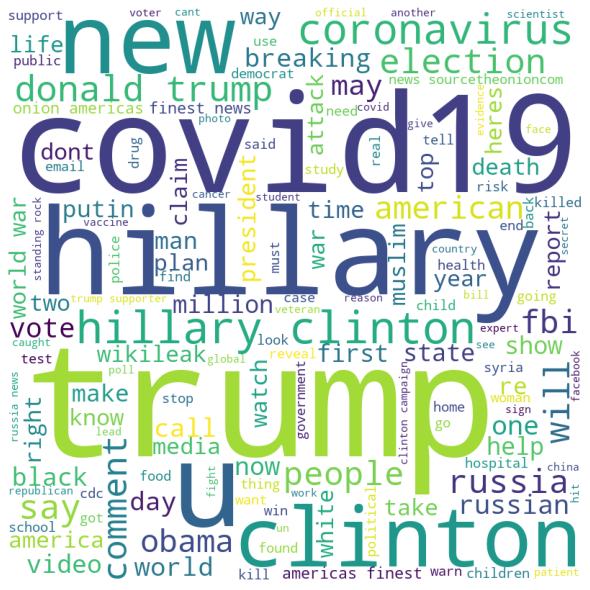

In [86]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Now for **real news** :

In [87]:
visual = train.text_lemmatized[train.target == 1]
comment_words = ''
for val in visual:
    # split the value
    tokens = val.split()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(comment_words)

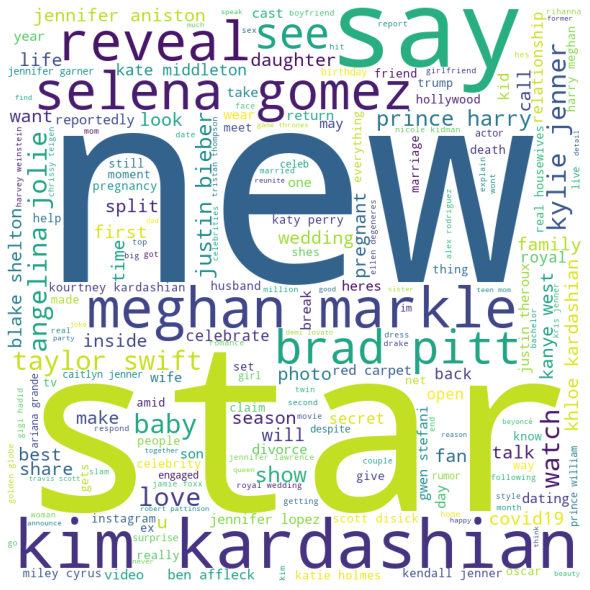

In [88]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Next step is **Vectorization**:

In [89]:
X_train = train['text_lemmatized']
Y_train = train['target']

Using TF-IDF Vectorization

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(X_train)

Next, split the data into training and testing sets

In [91]:
X_train, X_test, y_train, y_test = train_test_split(vectors,Y_train, random_state=0)

## Training and Testing the Model

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

### Logistic Regression

Training the model:

In [95]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_predicted = logreg_model.predict(X_test)

Accuracy

In [96]:
logreg_model.score(X_test,y_test)

0.9028167550150712

Confusion Matrix

In [97]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[3581,  495],
       [ 440, 5105]], dtype=int64)

Text(33.0, 0.5, 'Truth')

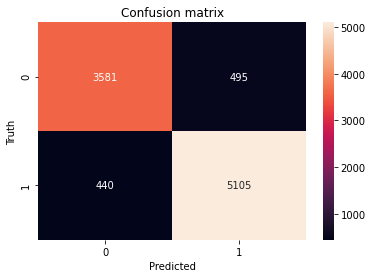

In [101]:
sns.heatmap(cm, annot=True, fmt = 'd')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(33.0, 0.5, 'Truth')

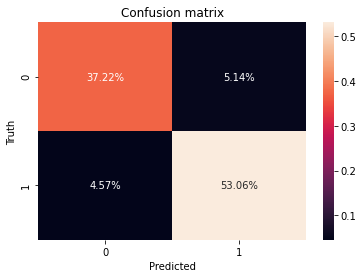

In [99]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt = '.2%')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Multinominal Naive Bayes

Train the model:

In [102]:
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_predicted = NB_model.predict(X_test)

Accuracy

In [103]:
NB_model.score(X_test,y_test)

0.9095728094792641

Confusion Matrix

In [104]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[3576,  500],
       [ 370, 5175]], dtype=int64)

Text(33.0, 0.5, 'Truth')

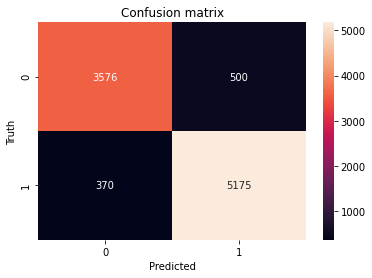

In [105]:
sns.heatmap(cm, annot=True, fmt = 'd')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(33.0, 0.5, 'Truth')

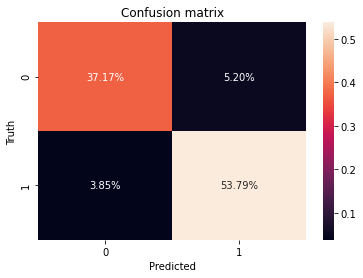

In [106]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt = '.2%')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')